In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def load_img(): 
    bmg = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(bmg, text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return bmg 

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

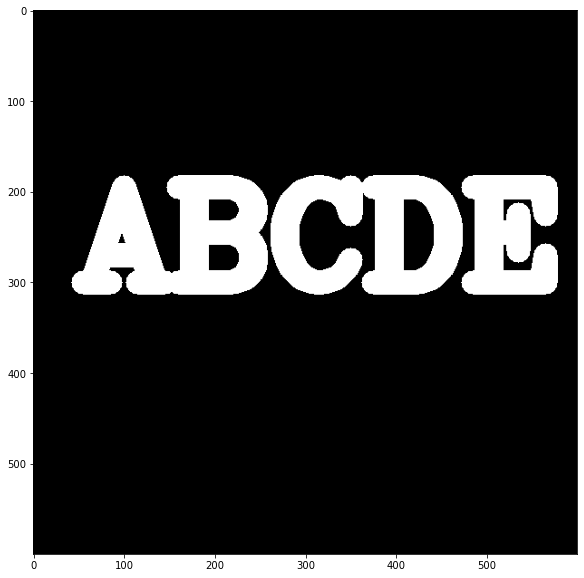

In [4]:
img = load_img()
display_img(img)

#EROSION

#Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark

In [5]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=4)

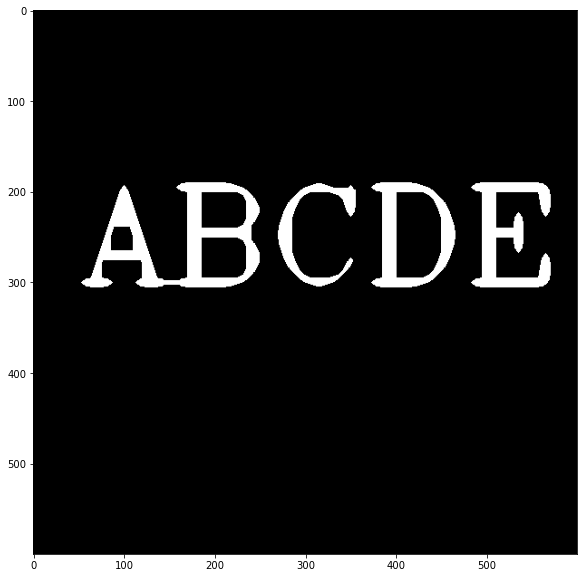

In [6]:
display_img(erosion)

In [7]:
#OPENING - Helpful in reducing background noise 

In [8]:
#OPENING = EROSION AND DILATION

In [9]:
#Adding white noise... 

In [10]:
img =load_img()

In [11]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [13]:
white_noise.shape


(600, 600)

In [14]:
white_noise

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

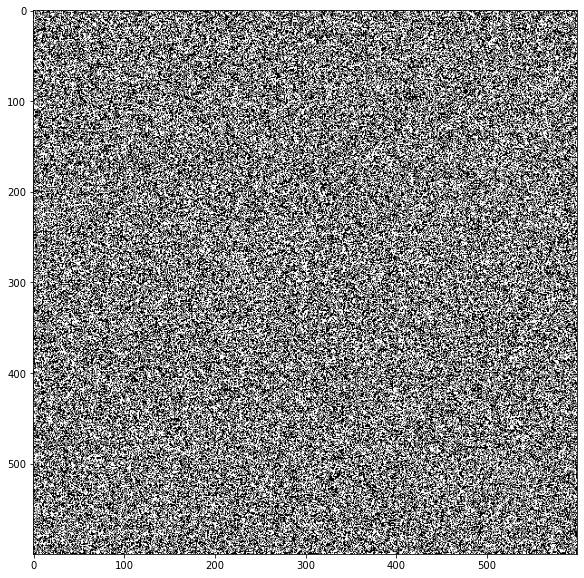

In [15]:
display_img(white_noise)

In [16]:
#making it as same scale as img 

white_noise = white_noise * 255

In [17]:
white_noise.shape

(600, 600)

In [18]:
white_noise

array([[  0,   0, 255, ...,   0,   0, 255],
       [  0, 255,   0, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0, 255, 255],
       ...,
       [255,   0, 255, ..., 255, 255,   0],
       [  0, 255,   0, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0]])

In [19]:
img.shape

(600, 600)

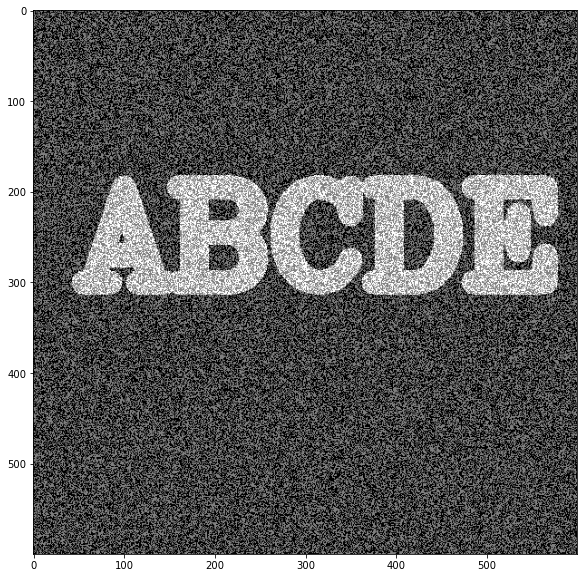

In [20]:
noisy = white_noise + img
display_img(noisy)

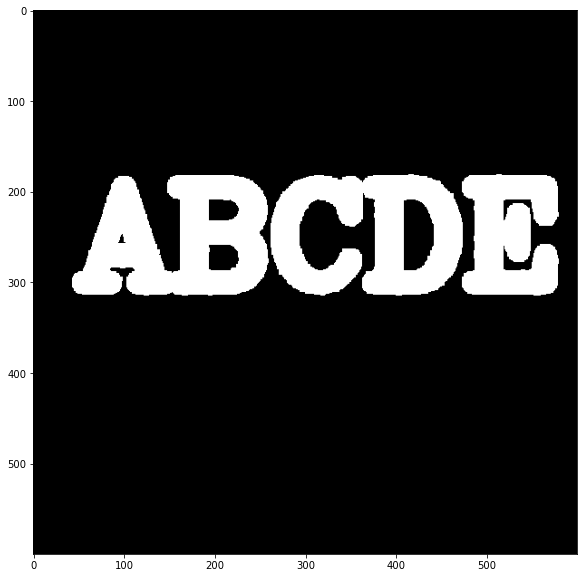

In [21]:
#

opening = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)
display_img(opening)

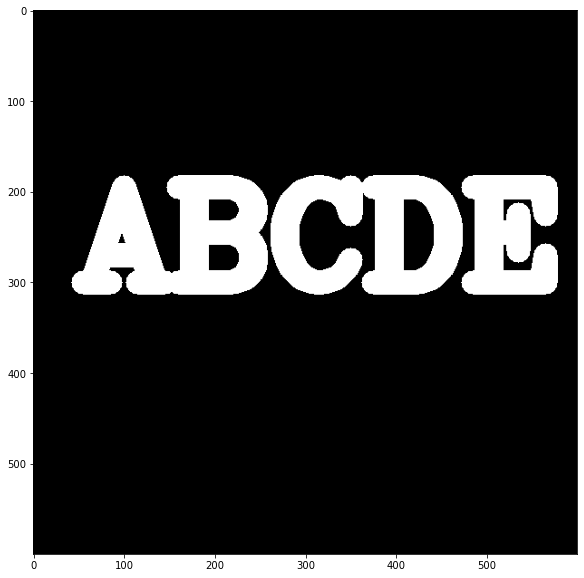

In [22]:
display_img(img)

In [23]:
#image has foreground noise 

black_noise = np.random.randint(low=0, high=2,size=(600,600))

In [24]:
black_noise = black_noise * -255

In [25]:
img = load_img()

In [26]:
bn_img = black_noise + img 

In [27]:
#making all values non negative, brnging it to zero

bn_img[bn_img == -255] = 0

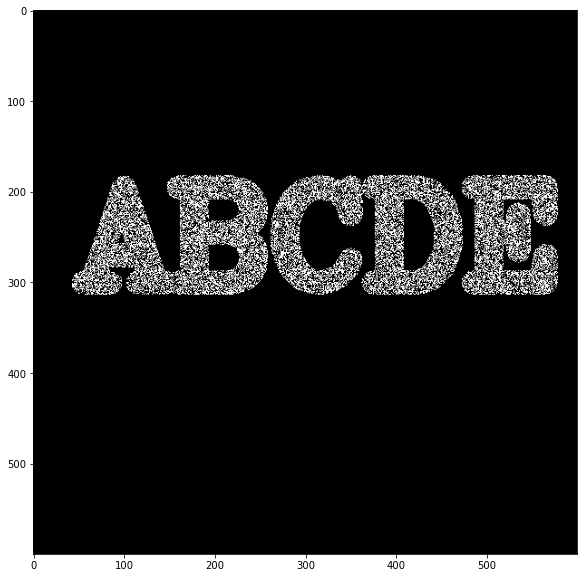

In [28]:
display_img(bn_img)

In [29]:
#foreground noise removal

closing = cv2.morphologyEx(bn_img, cv2.MORPH_CLOSE, kernel)

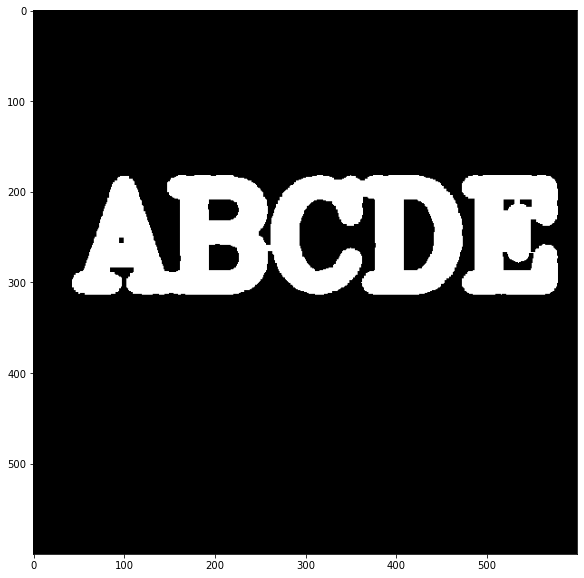

In [30]:
display_img(closing)

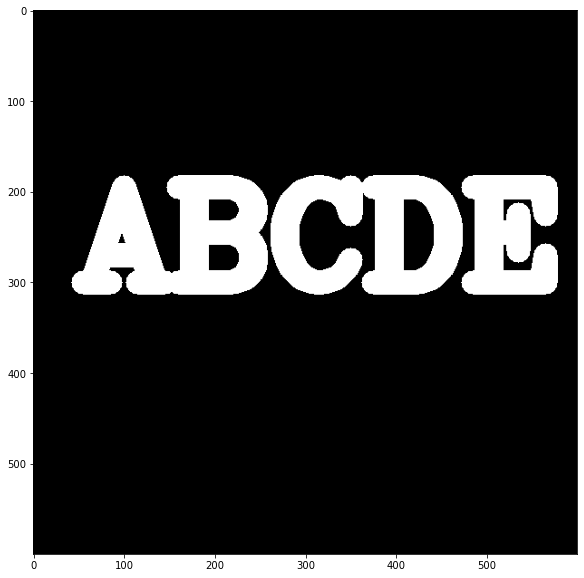

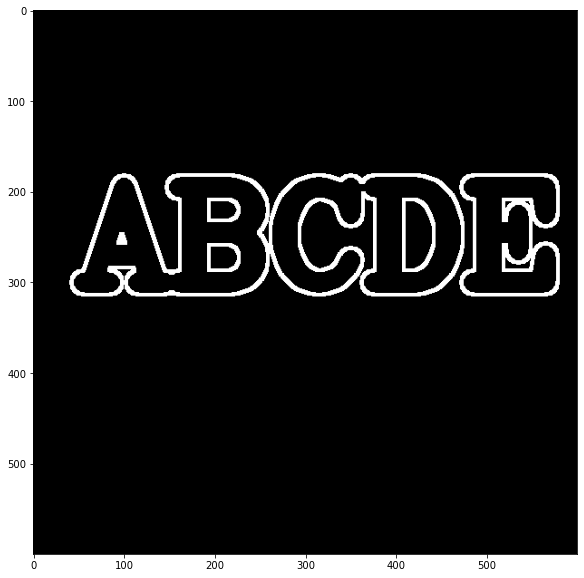

In [31]:
#gradient

img = load_img()
display_img(img)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)